## **This file contains the code snippets used and worked on during the Algorithms for DNA sequencing course on coursera. This file contains the code for week 1 classes as well as homework/quiz sections**

In [1]:
def longestCommonPrefix(s1,s2):
  i=0
  while i < len(s1) and i<len(s2) and s1[i] == s2[i] :
    i+=1
  return s1[:i]

longestCommonPrefix('ACTCATAG','ACCAGAC')

'AC'

In [0]:
def match(s1,s2):
  if not len(s1) == len(s2):
    return False
  
  for i in range(len(s1)):
    if not s1[i] == s2[i]:
      return False

  return True
match('ATTAC','ATTAT')

False

In [0]:
def reverseComplement(s):
  complement  = {'A':'T','C':'G','G':'C','T':'A','N':'N'}
  t= ''
  for base in s:
    t = complement[base]+t
  return t

reverseComplement('ATTCGACT')

'AGTCGAAT'

#Here we will know see how to parse a reference genome lambda virus.fa

In [0]:
# Following line downloads FASTA file containing the lambda phage reference genome
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2020-06-14 22:02:33--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.192.209.101, 54.192.209.63, 54.192.209.224, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.192.209.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K   263KB/s    in 0.2s    

2020-06-14 22:02:33 (263 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [0]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('lambda_virus.fa')
len(genome)

48502

In [0]:
# Count the number of occurences of each base
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


# This section covers how to read a FASTQ file and what are the aspects of such a file. Also some preliminary analysis on such files

In [0]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2020-06-14 22:02:35--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.227.220.193, 13.227.220.8, 13.227.220.200, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.227.220.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K   936KB/s    in 0.2s    

2020-06-14 22:02:36 (936 KB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [0]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [0]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [0]:
hist = [0]*50

In [0]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


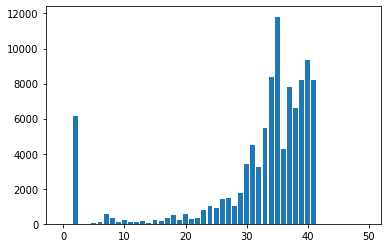

In [0]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

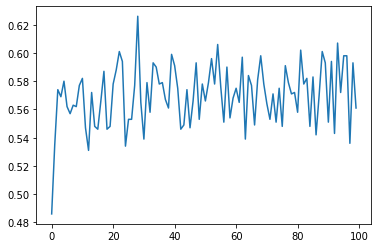

In [0]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [0]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'A': 21132, 'C': 28272, 'G': 28742, 'N': 18, 'T': 21836})

# This section shows working with Fasta file and how to use naive exact matching for the genome

In [0]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2020-06-14 22:02:38--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.227.171.38, 13.227.171.82, 13.227.171.149, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.227.171.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2020-06-14 22:02:38 (63.3 MB/s) - ‘phix.fa’ saved [5528/5528]



In [0]:
genome = readGenome('phix.fa')
len(genome)

5386

In [0]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1): #loop over alignments
        match = True
        for j in range(len(p)): #loop over characters
            if t[i+j] != p[j]: #compare characters
                match = False
                break
        if match:
          occurrences.append(i) #all chars matched;record
    return occurrences

In [0]:
t = 'GATTACA'
p = 'TAC'
naive(p, t)

[3]

In [0]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [0]:
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [0]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2020-06-14 22:02:40--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.192.209.63, 54.192.209.224, 54.192.209.17, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.192.209.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K   702KB/s    in 0.4s    

2020-06-14 22:02:41 (702 KB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [0]:
import collections
phix_reads,_ = readFastq('ERR266411_1.first1000.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
len(phix_reads)

1000

In [0]:
numMatched =0
n = 0
for r in phix_reads:
  r = r[:30]
  matches = naive(r,genome)
  n +=1
  if len(matches)>0:
    numMatched +=1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

459 / 1000 reads matched the genome exactly!


In [0]:
numMatched =0
n = 0
for r in phix_reads:
  r = r[:30]
  matches = naive(r,genome)
  matches.extend(naive(reverseComplement(r),genome)) #this part helps us to match the reverse complement of the strings too
  n +=1
  if len(matches)>0:
    numMatched +=1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

932 / 1000 reads matched the genome exactly!


In [0]:
lambda_virus = readGenome('lambda_virus.fa')

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

In [0]:
def naive_with_rc(p, t):
    rc = reverseComplement(p)
    if rc == p:
      matches = naive(p,t)
    else:
      matches = naive(p,t)
      matches.extend(naive(rc,t))
    return matches

In [0]:
p = 'TTAA'

t = readGenome('/content/lambda_virus.fa')
occurrences = naive_with_rc(p, t)
print(len(occurrences))

195


In [0]:
occurrences = naive_with_rc('AGTCGA', t)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 450
# occurrences: 9


In [0]:
def naive_2mm(p, t): #2 mismatches permitted
    occurrences = []
    for i in range(len(t) - len(p) + 1): #loop over alignments
        match = True
        mm = 0
        for j in range(len(p)): #loop over characters
            if t[i+j] != p[j]: #compare characters
                mm +=1
            if mm > 2:
              match = False
              break
        if match == True:
          occurrences.append(i) #all chars matched;record
    return occurrences

In [0]:
p = 'ACTTTA'

t = 'ACTTACTTGATAAAGT'
occurrences = naive_2mm(p, t)
print(occurrences)

[0, 4]


In [0]:
lambda_genome = readGenome('/content/lambda_virus.fa')
occurrences = naive_2mm('AGGAGGTT', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 49
# occurrences: 215


In [0]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq


--2020-06-14 23:01:17--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.227.220.8, 13.227.220.193, 13.227.220.200, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.227.220.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K   973KB/s    in 0.2s    

2020-06-14 23:01:18 (973 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



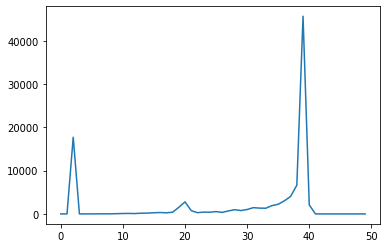

In [0]:
# here we are trying to analyze if there are any sequencing error is a particular cycle
seqs,quals = readFastq('/content/ERR037900_1.first1000.fastq') 
h = createHist(quals)
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()